In [88]:
%conda install plotly

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /Users/emily/anaconda3

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.08.22 |       hecd8cb5_0         124 KB
    certifi-2023.11.17         |  py311hecd8cb5_0         160 KB
    openssl-3.0.12             |       hca72f7f_0         4.5 MB
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following packages will be SUPERSEDED by a higher-priority chan

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SQLBigramData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          824 non-null    int64  
 1   creator             823 non-null    object 
 2   datePublished       824 non-null    object 
 3   docType             824 non-null    object 
 4   id                  824 non-null    object 
 5   publicationYear     824 non-null    int64  
 6   publisher           824 non-null    object 
 7   title               824 non-null    object 
 8   placeOfPublication  6 non-null      object 
 9   ngramCount          824 non-null    object 
 10  anSQLCount          824 non-null    float64
 11  aSQLCount           824 non-null    float64
 12  anSQL               824 non-null    float64
 13  aSQL                824 non-null    float64
dtypes: float64(4), int64(2), object(8)
memory usage: 90.3+ KB


In [4]:
df.drop(columns=['placeOfPublication', 'Unnamed: 0'], inplace=True)

In [5]:
df.sort_values(by=['publisher'])

,creator,datePublished,docType,id,publicationYear,publisher,title,ngramCount,anSQLCount,aSQLCount,anSQL,aSQL
657,"['P Trevisan', 'N Claassen']",2011-06-03,article,ark://27927/phzms6nv7c9,2011,Academy of Science of South Africa,DIESEL FUEL ADDITIVES: WORTH CONSIDERING? LOCA...,"{'analyser by': 1, 'sample and': 1, 'all three...",0.0,1.0,0.0,1.0
402,"['P.J.H. de Graaf', 'S.D.N. Wessels']",2016-05-01,article,ark://27927/phx82fqnrds,2016,Academy of Science of South Africa,A framework for managing geotechnical risk acr...,"{'can all': 1, '\x02 372': 1, 'approach whereb...",0.0,1.0,0.0,1.0
786,"['ANDRÁS NEMESLAKI', 'KÁROLY POCSAROVSZKY']",2012-03-01,article,http://www.jstor.org/stable/41472185,2012,Akadémiai Kiadó,SUPPORTING E-BUSINESS RESEARCH WITH WEB CRAWLE...,"{'Bids and': 1, 'be an': 1, '107-1 17.': 1, '-...",2.0,0.0,1.0,0.0
735,['Darrell G. Stewart'],2006-04-01,article,http://www.jstor.org/stable/23672988,2006,American Bar Association,"OLD DOCS, NEW TRICKS: KNOWLEDGE DATABASES MADE...","{'law in': 1, 'particularly helpful': 1, 'use ...",2.0,0.0,1.0,0.0
736,['Hal R. Varian'],2014-04-01,article,http://www.jstor.org/stable/23723482,2014,American Economic Association,Big Data: New Tricks for Econometrics,"{'expectancy 0.946': 2, 'or several': 1, 'and ...",3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
228,"['Nigel Wilson', 'Wei Wang', 'John Attanucci']",2011-12-01,article,ark://27927/pgk3h99bf8c,2011,University of South Florida,Bus Passenger Origin-Destination Estimation an...,"{'P. R.': 1, 'and trip,': 1, 'destination. Exp...",1.0,0.0,1.0,0.0
8,"['Desney Tan, Emma Berry, Mary Czerwinski, Gor...",2007-01-01,chapter,ark://27927/pbd81b508x,2007,University of Washington Press,6. Save Everything: Supporting Human Memory wi...,"{'Challenge in': 1, 'months. The': 1, 'minutes...",0.0,1.0,0.0,1.0
796,"['ELTON BARKER', 'LEIF ISAKSEN', 'NICK RABINOW...",2013-01-01,article,http://www.jstor.org/stable/44216322,2013,Wiley,ON USING DIGITAL RESOURCES FOR THE STUDY OF AN...,"{'and outcomes': 1, 'also with': 1, 'project w...",0.0,1.0,0.0,1.0
725,['Bo Sundgren'],1996-04-01,article,http://www.jstor.org/stable/1403422,1996,Wiley,Making Statistical Data More Available,"{'meta-infor- mation.': 1, 'when they': 2, 'st...",1.0,0.0,1.0,0.0


In [6]:
df2 = df[['publisher', 'anSQL', 'aSQL', 'id']]
df2.head()

,publisher,anSQL,aSQL,id
0,Cambridge University Press,1.0,0.0,ark://27927/pbd1pgqfbnb
1,Cambridge University Press,1.0,0.0,ark://27927/pbd1pgrrq8r
2,Cambridge University Press,0.0,1.0,ark://27927/pbd6bn866k
3,Cambridge University Press,1.0,0.0,ark://27927/pbd6bvp8dh
4,Cambridge University Press,0.0,1.0,ark://27927/pbd6f4pcdd


In [7]:
df2 = df2.groupby('publisher').agg({'anSQL': 'sum', 'aSQL': 'sum', 'id':lambda x: list(x)})

In [8]:
df2['len'] = df2['id'].apply(lambda x: len(x))
df2['anpercent'] = (df2['anSQL']/df2['len']) * 100
df2['apercent'] = (df2['aSQL']/df2['len']) * 100


In [9]:
print(len(df2.loc[(df2['anpercent'] != 100) & (df2['apercent'] != 100)]))
print(len(df2))
print(len(df2.loc[(df2['anSQL']>0) & (df2['aSQL']>0)]))

27
73
29


- not tons of evidence of a publisher style guide for this 
- some publishers might but definitely not all
- --> likely no need to only have one title per publisher

In [10]:
df3 = df[['docType', 'anSQL', 'aSQL', 'id']]
df3 = df3.groupby('docType').agg({'anSQL': 'sum', 'aSQL': 'sum', 'id':lambda x: list(x)})
df3['len'] = df3['id'].apply(lambda x: len(x))
df3['SQL'] = df3['anSQL'] + df3 ['aSQL']
df3['anpercent'] = (df3['anSQL']/df3['len']) * 100
df3['apercent'] = (df3['aSQL']/df3['len']) * 100
df3.head()

,anSQL,aSQL,id,len,SQL,anpercent,apercent
docType,,,,,,,
article,512.0,300.0,"[ark://27927/pc0156h05v, ark://27927/pc015889h...",783,812.0,65.389527,38.314176
book,10.0,5.0,"[ark://27927/pbd9dh0bqt, ark://27927/pbd9dh363...",13,15.0,76.923077,38.461538
chapter,20.0,9.0,"[ark://27927/pbd1pgqfbnb, ark://27927/pbd1pgrr...",26,29.0,76.923077,34.615385
research_report,2.0,0.0,"[http://www.jstor.org/stable/resrep22867, http...",2,2.0,100.000000,0.000000


no evidence of distribution differing by docType

In [11]:
df.columns

Index(['creator', 'datePublished', 'docType', 'id', 'publicationYear',
       'publisher', 'title', 'ngramCount', 'anSQLCount', 'aSQLCount', 'anSQL',
       'aSQL'],
      dtype='object')

In [52]:
new_df = df[['datePublished', 'id', 'publicationYear','anSQL', 'aSQL']]
new_df.head()

,datePublished,id,publicationYear,anSQL,aSQL
0,2009-01-01,ark://27927/pbd1pgqfbnb,2009,1.0,0.0
1,2015-01-01,ark://27927/pbd1pgrrq8r,2015,1.0,0.0
2,2009-01-01,ark://27927/pbd6bn866k,2009,0.0,1.0
3,2011-01-01,ark://27927/pbd6bvp8dh,2011,1.0,0.0
4,2009-01-01,ark://27927/pbd6f4pcdd,2009,0.0,1.0


In [53]:
new_df.isna().any()

datePublished      False
id                 False
publicationYear    False
anSQL              False
aSQL               False
dtype: bool

In [17]:
new_df.dtypes

datePublished       object
id                  object
publicationYear      int64
anSQL              float64
aSQL               float64
dtype: object

In [54]:
new_df['datePublished'] = pd.to_datetime(new_df['datePublished'])
new_df['anSQL'] = new_df['anSQL'].astype('int64')
new_df['aSQL'] = new_df['aSQL'].astype('int64')



/var/folders/qr/t32q1dbd6mgc4vqxkmqyn2dc0000gn/T/ipykernel_15296/3650478919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['datePublished'] = pd.to_datetime(new_df['datePublished'])
/var/folders/qr/t32q1dbd6mgc4vqxkmqyn2dc0000gn/T/ipykernel_15296/3650478919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['anSQL'] = new_df['anSQL'].astype('int64')
/var/folders/qr/t32q1dbd6mgc4vqxkmqyn2dc0000gn/T/ipykernel_15296/3650478919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [55]:
new_df.dtypes

datePublished      datetime64[ns]
id                         object
publicationYear             int64
anSQL                       int64
aSQL                        int64
dtype: object

In [56]:
new_df.loc[(new_df['datePublished'].dt.month == 1) & (new_df['datePublished'].dt.day == 1)]

,datePublished,id,publicationYear,anSQL,aSQL
0,2009-01-01,ark://27927/pbd1pgqfbnb,2009,1,0
1,2015-01-01,ark://27927/pbd1pgrrq8r,2015,1,0
2,2009-01-01,ark://27927/pbd6bn866k,2009,0,1
3,2011-01-01,ark://27927/pbd6bvp8dh,2011,1,0
4,2009-01-01,ark://27927/pbd6f4pcdd,2009,0,1
...,...,...,...,...,...
812,2017-01-01,http://www.jstor.org/stable/j.ctv3t5qjk.26,2017,1,0
813,2017-01-01,http://www.jstor.org/stable/j.ctvhhhdbh.82,2017,1,0
816,2015-01-01,http://www.jstor.org/stable/jeductechsoci.18.1...,2015,1,0
820,2023-01-01,http://www.jstor.org/stable/jj.2430371,2023,1,1


In [81]:
new_df2 = new_df.groupby('publicationYear', as_index=False).agg({'anSQL': 'sum', 'aSQL':'sum'})
new_df2['anpercent'] = (new_df2['anSQL']/(new_df2['anSQL']+new_df2['aSQL'])) * 100
new_df2['apercent'] = (new_df2['aSQL']/(new_df2['anSQL']+new_df2['aSQL'])) * 100
new_df2

,publicationYear,anSQL,aSQL,anpercent,apercent
0,1983,1,0,100.000000,0.000000
1,1987,0,1,0.000000,100.000000
2,1988,3,1,75.000000,25.000000
3,1989,2,0,100.000000,0.000000
4,1990,2,0,100.000000,0.000000
5,1991,3,0,100.000000,0.000000
6,1992,6,1,85.714286,14.285714
7,1993,5,0,100.000000,0.000000
8,1994,2,4,33.333333,66.666667
9,1995,9,5,64.285714,35.714286


In [105]:
new_df.to_csv('finalJSTORData.csv')
new_df2.to_csv('finalJSTORData_groupbyPubYear.csv')

/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

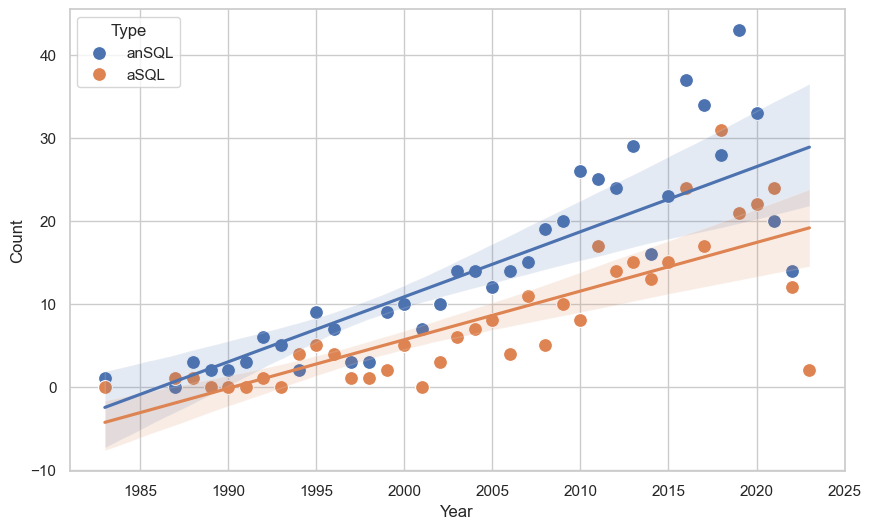

In [86]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x="publicationYear", y="anSQL", data=new_df2, s=100)

sns.scatterplot(x="publicationYear", y="aSQL", data=new_df2, s=100)

sns.regplot(x="publicationYear", y="anSQL", data=new_df2, scatter=False)
sns.regplot(x="publicationYear", y="aSQL", data=new_df2, scatter=False)

scatterplot.set(xlabel="Year", ylabel="Count")
plt.legend(title="Type", loc="upper left", labels=["anSQL", "aSQL"])

plt.show()

/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emily/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

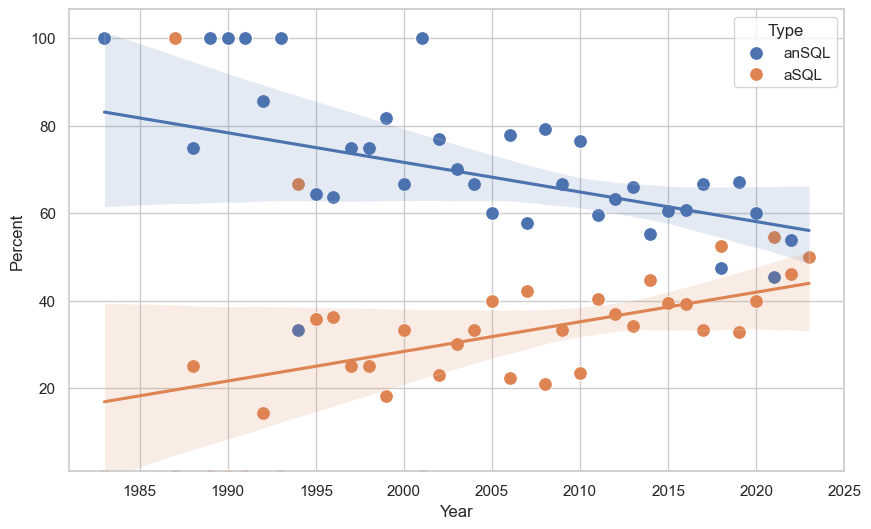

In [87]:
plt.figure(figsize=(10, 6))
scatterplot = sns.scatterplot(x="publicationYear", y="anpercent", data=new_df2, s=100)

sns.scatterplot(x="publicationYear", y="apercent", data=new_df2, s=100)

sns.regplot(x="publicationYear", y="anpercent", data=new_df2, scatter=False)
sns.regplot(x="publicationYear", y="apercent", data=new_df2, scatter=False)

scatterplot.set(xlabel="Year", ylabel="Percent")
plt.legend(title="Type", loc="upper right", labels=["anSQL", "aSQL"])
plt.ylim(1)


plt.show()

In [92]:
import plotly.express as px

# Assuming your DataFrame is named df
fig = px.scatter(new_df2, x="publicationYear", y=["anSQL", "aSQL"], color_discrete_sequence=["blue", "orange"],
                 labels={"value": "Count", "variable": "Type"})

#  Adding regression lines
# fig.add_trace(px.line(new_df2, x="publicationYear", y="anSQL").data[0])
# fig.add_trace(px.line(new_df2, x="publicationYear", y="aSQL").data[0])

# Show the plot
fig.show()

In [93]:
%conda install plotnine

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /Users/emily/anaconda3

  added / updated specs:
    - plotnine


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mizani-0.9.2               |  py311hecd8cb5_0         191 KB
    plotnine-0.12.1            |  py311hecd8cb5_0         5.3 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following NEW packages will be INSTALLED:

  mizani             pkgs/main/osx-64::mizani-0.9.2-py311hecd8cb5_0 
  plotnine           pkgs/main/osx-64::plotnine-0.12.

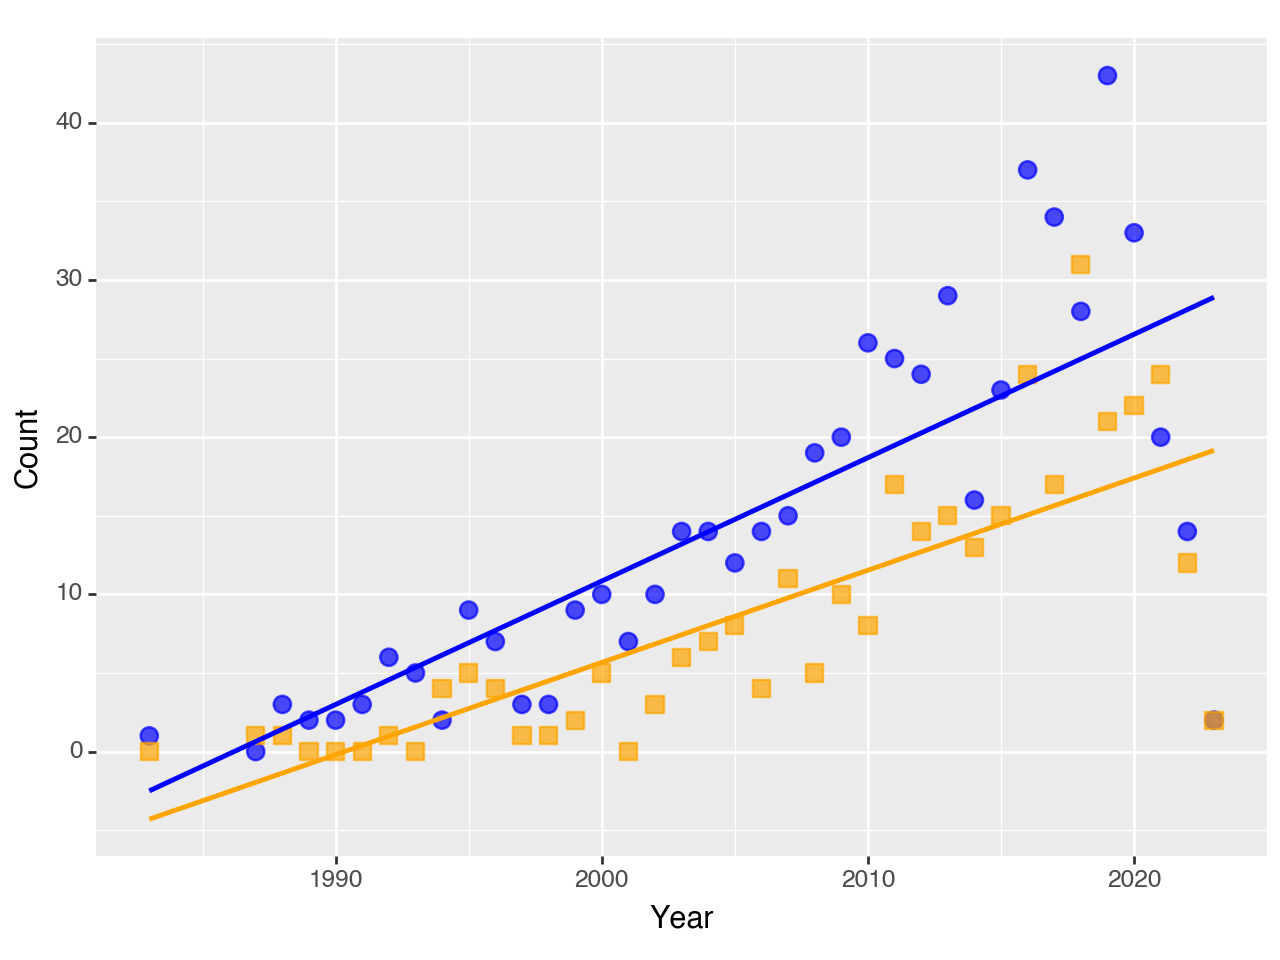

In [104]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs

plot = (ggplot(new_df2, aes(x='publicationYear'))
        + geom_point(aes(y='anSQL'), size=3, fill='blue', color='blue', alpha=0.7)
        + geom_point(aes(y='aSQL'), shape='s', size=3, fill='orange', color='orange', alpha=0.7)
        + geom_smooth(aes(y='anSQL'), method='lm', se=False, color='blue')
        + geom_smooth(aes(y='aSQL'), method='lm', se=False, color='orange')
        + labs(x='Year', y='Count', color='Type'))

# Show the plot
print(plot)